# ANALYSIS OF FUNDING FOR INDIAN STARTUP ECOSYSTEM 


### Overview
Welcome to the analysis of the Indian startup ecosystem funding data from 2018 to 2021. In this repository, you will find datasets containing details about startups, the funding amounts they received, and information about the investors involved. The objective is to provide a comprehensive understanding of the funding landscape in the Indian startup ecosystem during the specified years.

### Objectives
Funding Landscape Exploration: Investigate and understand the funding patterns, trends, and distributions within the Indian startup ecosystem for the specified years.

Sector-wise Analysis: Analyze funding trends across different industry sectors to identify key areas of investment and growth.
Investor Insights: Examine the involvement of investors, both in terms of frequency and amount, to identify influential backers in the startup ecosystem.

Startup Profiling: Profile startups based on their founding years, sectors, and funding stages to gain a holistic view of the evolving entrepreneurial landscape.

Recommendations: Formulate actionable recommendations based on the analysis, guiding the team's strategic approach and potential opportunities within the Indian startup ecosystem.
 

### Hypothesis
Null  and Alternate Hypothesis
- H/0 In 2021 investments available to startups were the same as 2020
- H/1 In 2021 investments available to startups were not the same as 2020
has context menu

### Questions
1. Which year has the highest amount of investment?
2. Which sector received the highest amount of funding collectively?
3. Which region has the most startups?
4. Which Region received the most investment
5. Which sector received the lowest amount of funding collectively?

In [412]:
import pyodbc
from dotenv import dotenv_values  #import the dotenv_values function from the dotenv package
import pandas as pd
import warnings
import io
import requests
 
warnings.filterwarnings('ignore')

### Hypothesis
H0: The average funding received by startups is 50 million.
 
Ha: The average funding received by startups is not 50 million.

In [413]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [414]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [415]:
connection = pyodbc.connect(connection_string)

In [416]:
#querying data of year 2020
query_2020 = "SELECT*FROM dbo.LP1_startup_funding2020"
data2020 = pd.read_sql(query_2020, connection)
# print the first 5 rows
data2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [417]:
data2020.shape

(1055, 10)

### Visualization for the missing data before cleaning

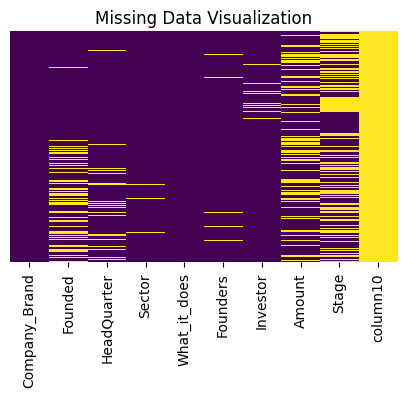

Missing Values Summary:
 Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64


In [478]:

# Check for missing values
missing_values = data2020.isnull().sum()

# Visualize missing data
plt.figure(figsize=(5, 3))
sns.heatmap(data2020.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Visualization')
plt.show()

# Display missing values summary
print("Missing Values Summary:\n", missing_values)

### Dealing with 'Undisclosed' and/or 'undisclosed'
- We delete! This is because we the information for amount was not given but it doesnt mean the company was not funded
- Therefore we cannot assign it NaN,N/A or 0 values

In [460]:




# Convert 'Amount' column to string and delete rows where 'Amount' is "Undisclosed" or "undisclosed"
data2020 = data2020[(data2020['Amount'].astype(str).str.lower() != 'undisclosed') & (data2020['Amount'] != 'Undisclosed')]

# Display the DataFrame after deleting the rows
#print("DataFrame after deleting rows with 'Undisclosed' and 'undisclosed' in 'Amount' column:")
#data2020.head()
print("Any row whose Amounts colunm has values  'Undisclosed' and/or 'undisclosed' has been deleted!")


Any row whose Amounts colunm has values  'Undisclosed' and/or 'undisclosed' has been deleted!


In [419]:

data2020.shape


(1055, 10)

In [420]:
# showing the data type 
data2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


In [421]:
# checking the frequency count of missing values 
data2020.apply(lambda X:sum(X.isnull())) 

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

In [422]:
def swap_non_numeric_with_numeric(df):
    amounts_column = 'Amount'
    stage_column = 'Stage'
    investor_column = 'Investor'

 
    # Function to find non-numeric values in 'Amounts' column
    def find_non_numeric_values():
        non_numeric_dict = {}
        for index, value in df[amounts_column].items():
            try:
                pd.to_numeric(value)
            except ValueError:
                non_numeric_dict[index] = value
        return non_numeric_dict
 
    # Function to find numeric values in 'Stage' column
    def find_numeric_values():
        numeric_dict = {}
        for index, value in df[stage_column].items():
            try:
                numeric_dict[index] = pd.to_numeric(value)
            except ValueError:
                pass  # Ignore non-numeric values
        return numeric_dict
 
    # Find non-numeric values in 'Amounts' column
    non_numeric_values = find_non_numeric_values()
 
    # Find numeric values in 'Stage' column
    numeric_values = find_numeric_values()
 
    # Swap non-numeric values in 'Amounts' with numeric values in 'Stage'
    for index, non_numeric_value in non_numeric_values.items():
        if index in numeric_values:
            df.at[index, amounts_column] = numeric_values[index]
 
    # Swap numeric values in 'Stage' with non-numeric values in 'Amounts'
    for index, numeric_value in numeric_values.items():
        if index in non_numeric_values:
            df.at[index, stage_column] = non_numeric_values[index]
 
    # Function to find numeric values in 'Investor' column
    def find_numeric_values_founders():
        numeric_dict = {}
        for index, value in df[investor_column].items():
            try:
                numeric_dict[index] = pd.to_numeric(value)
            except ValueError:
                pass  # Ignore non-numeric values
        return numeric_dict
 
    # Function to find non-numeric values in 'Amounts' column
    def find_non_numeric_values_founders():
        non_numeric_dict = {}
        for index, value in df[amounts_column].items():
            try:
                pd.to_numeric(value)
            except ValueError:
                non_numeric_dict[index] = value
        return non_numeric_dict
 
    # Find non-numeric values in 'Amounts' column
    non_numeric_values = find_non_numeric_values_founders()
 
    # Find numeric values in 'Founders' column
    numeric_values = find_numeric_values_founders()
 
    # Swap non-numeric values in 'Amounts' with numeric values in 'Founders'
    for index, non_numeric_value in non_numeric_values.items():
        if index in numeric_values:
            df.at[index, amounts_column] = numeric_values[index]
 
    # Swap numeric values in 'Founders' with non-numeric values in 'Amounts'
    for index, numeric_value in numeric_values.items():
        if index in non_numeric_values:
            df.at[index, investor_column] = non_numeric_values[index]
 
    return df
 
 
def strip_dollar_and_comma(df):
    # Assuming column names are 'Amounts' and 'Stage'
    numeric_columns = ['Investor', 'Amount', 'Stage']
 
    # Iterate through numeric columns and strip dollar sign ($) and comma (,)
    for column in numeric_columns:
        df[column] = df[column].replace('[\$]', '', regex=True)
 
    return df
 
 
def replace_non_numeric_with_zero(df):
    # Assuming column name is 'Amounts'
    amounts_column = 'Amount'
    # Replace non-numeric values in 'Amounts' column with 0
    df[amounts_column] = pd.to_numeric(df[amounts_column], errors='coerce').fillna(0).astype(int)
 
    return df


def fill_null_values(df):
    # Specify the columns to fill with 'N/A'
    columns_to_fill_na = ['HeadQuarter', 'Investor', 'Stage','Sector']
 
    # Fill null values in specified columns with 'N/A'
    df[columns_to_fill_na] = df[columns_to_fill_na].fillna('N/A')

    # Fill null values in 'Founded' with 0   
    df['Founded'] = df['Founded'].fillna(0)

    # Convert 'Founded' values to integers    
    df['Founded'] = df['Founded'].astype(int)
 
    return df


  
 
# Example usage
#data = {'Founders': ['$1,200', '$1,300,000', '', 'D', 'E', 'F', '', 'H', 'J', 'K'],
       # 'Amounts': ['A', 'Undisclosed', '$4,000', '$5,000', 'undisclosed', '$7,000,000', 'Seed', '$4,000', 'series A', '$5,000'],
       # 'Stage': ['Upsparks', 'Series C', 'series c', 'seed', 'seed', 'seed', '$2,000', 'seed', '$3,000', 'series A']}
df = pd.DataFrame(data2020)
 
# Display the DataFrame before processing
#print("DataFrame before processing:")
#print(df)
info = df.info()
#print("\n Info before processing")
#print(info)
 
# Call the function to replace NaN values in 'Founders' with "N/A"
df['Founders'] = df['Founders'].fillna('N/A')
 
# Call the function to strip dollar sign and comma from numeric values
df = strip_dollar_and_comma(df)
 
# Display the DataFrame after stripping dollar sign and comma
#print("\nDataFrame after stripping dollar sign and comma:")
#print(df)
 
# Call the function to swap non-numeric with numeric values
df = swap_non_numeric_with_numeric(df)
 
# Display the DataFrame after swapping Numerical values in Stage with non-numericals in amounts
#print("\nDataFrame after swapping numeric in 'Stage' with non-numeric values in 'Amount':")
#print(df)
 
# Call the function to swap numeric with non-numeric values in 'Founders'
df = swap_non_numeric_with_numeric(df)
 
# Display the DataFrame after swapping numeric with non-numeric values in 'Founders'
#print("\nDataFrame after swapping numeric in 'Founders' with non-numeric values in 'Amount':")
#print(df)
# Call the function to fill null values with 'N/A'
df = fill_null_values(df)
 # Display the DataFrame after filling null values
#print("\nDataFrame after filling null values with 'N/A':")

#print(df)
# Call the function to replace non-numeric values in 'Amounts' with 0
df = replace_non_numeric_with_zero(df)

# Call the function to fill null values in  'Founded' with 0
df = fill_null_values(df) 
# Display the DataFrame after filling null values
#print("\nDataFrame after filling null values with 'N/A' and 'Founded' with 0:")
#print(df)

 
 
# Display the DataFrame after replacing non-numeric values with 0
#My amounts column should have all numerics
#print("\nDataFrame after replacing non-numeric values with 0 :")
print("\nDataFrame after processing:")
cleandata_2020=df
cleandata_2020.head(10)

 


DataFrame before processing:
     Company_Brand  Founded HeadQuarter              Sector  \
0       Aqgromalin   2019.0     Chennai            AgriTech   
1         Krayonnz   2019.0   Bangalore              EdTech   
2     PadCare Labs   2018.0        Pune  Hygiene management   
3            NCOME   2020.0   New Delhi              Escrow   
4       Gramophone   2016.0      Indore            AgriTech   
...            ...      ...         ...                 ...   
1050  Leverage Edu      NaN       Delhi              Edtech   
1051         EpiFi      NaN        None             Fintech   
1052       Purplle   2012.0      Mumbai           Cosmetics   
1053        Shuttl   2015.0       Delhi           Transport   
1054         Pando   2017.0     Chennai            Logitech   

                                           What_it_does  \
0                          Cultivating Ideas for Profit   
1     An academy-guardian-scholar centric ecosystem ...   
2      Converting bio-hazardous waste

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,N/A,None
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Pre-seed,None
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,0,Pre-seed,None
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,N/A,None
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,N/A,None
5,qZense,2019,Bangalore,AgriTech,qZense Labs is building the next-generation Io...,"Rubal Chib, Dr Srishti Batra","Venture Catalysts, 9Unicorns Accelerator Fund",600000,Seed,None
6,MyClassboard,2008,Hyderabad,EdTech,MyClassboard is a full-fledged School / Colleg...,Ajay Sakhamuri,ICICI Bank.,600000,Pre-series A,None
7,Metvy,2018,Gurgaon,Networking platform,AI driven networking platform for individuals ...,Shawrya Mehrotra,HostelFund,0,Pre-series,None
8,Rupeek,2015,Bangalore,FinTech,Rupeek is an online lending platform that spec...,"Amar Prabhu, Ashwin Soni, Sumit Maniyar","KB Investment, Bertelsmann India Investments",45000000,Series C,None
9,Gig India,2017,Pune,Crowdsourcing,GigIndia is a marketplace that provides on-dem...,"Aditya Shirole, Sahil Sharma","Shantanu Deshpande, Subramaniam Ramadorai",1000000,Pre-series A,None


In [423]:
#dropping column 10
final_2020=cleandata_2020.drop('column10', axis=1)


### Visualisation for 2020 data  after cleaning

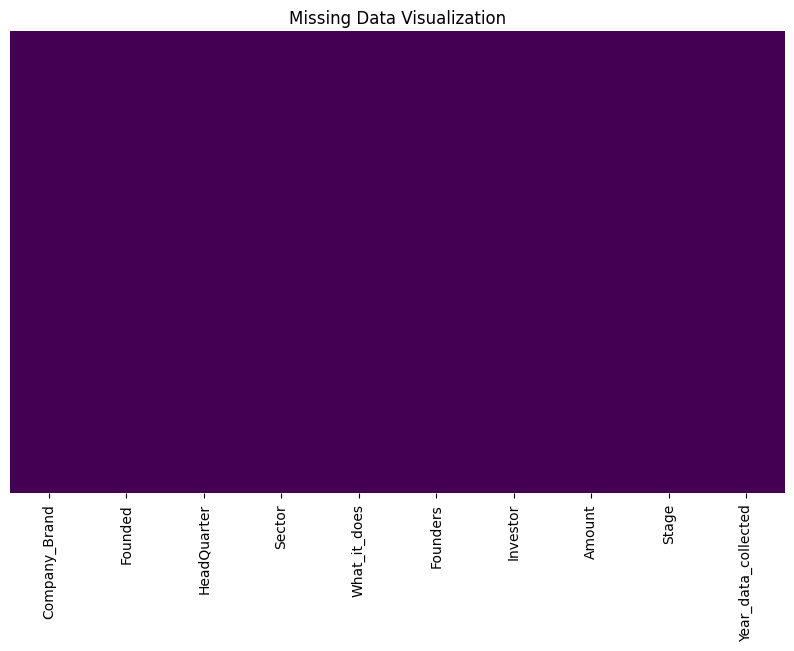

Missing Values Summary:
 Company_Brand          0
Founded                0
HeadQuarter            0
Sector                 0
What_it_does           0
Founders               0
Investor               0
Amount                 0
Stage                  0
Year_data_collected    0
dtype: int64


In [462]:
# Check for missing values
missing_values = final_2020.isnull().sum()

# Visualize missing data
plt.figure(figsize=(5, 3))
sns.heatmap(final_2020.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Visualization')
plt.show()

# Display missing values summary
print("Missing Values Summary:\n", missing_values)

In [424]:
final_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Brand  1055 non-null   object
 1   Founded        1055 non-null   int32 
 2   HeadQuarter    1055 non-null   object
 3   Sector         1055 non-null   object
 4   What_it_does   1055 non-null   object
 5   Founders       1055 non-null   object
 6   Investor       1055 non-null   object
 7   Amount         1055 non-null   int32 
 8   Stage          1055 non-null   object
dtypes: int32(2), object(7)
memory usage: 66.1+ KB


In [425]:
query_2021 = "SELECT*FROM dbo.LP1_startup_funding2021"
data2021 = pd.read_sql(query_2021, connection)
data2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


### Visualization for 2021 data before cleaning

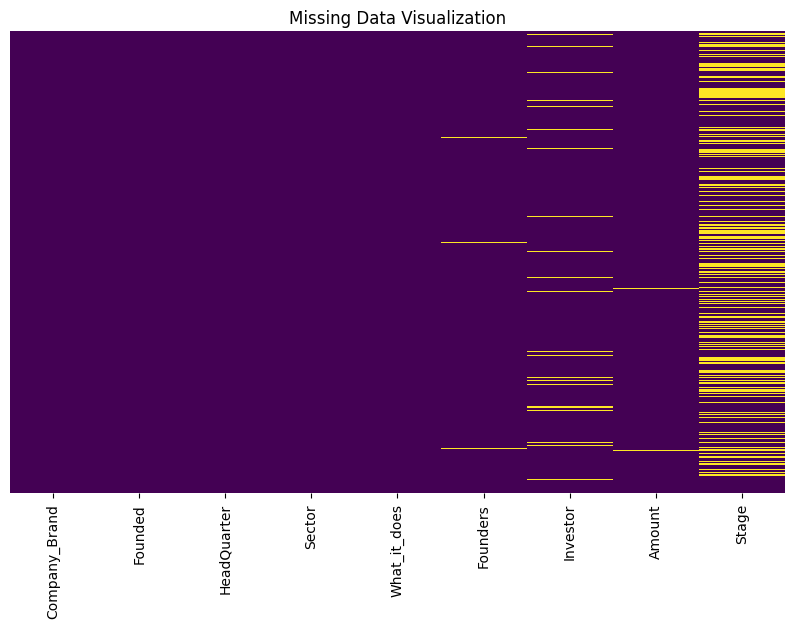

Missing Values Summary:
 Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          61
Amount             3
Stage            412
dtype: int64


In [463]:
# Check for missing values
missing_values = data2021.isnull().sum()

# Visualize missing data
plt.figure(figsize=(5, 3))
sns.heatmap(data2021.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Visualization')
plt.show()

# Display missing values summary
print("Missing Values Summary:\n", missing_values)

In [426]:
# Convert 'Amount' column to string and delete rows where 'Amount' is "Undisclosed" or "undisclosed"
data2021 = data2021[(data2021['Amount'].astype(str).str.lower() != 'undisclosed') & (data2021['Amount'] != 'Undisclosed')]

# Display the DataFrame after deleting the rows
print("DataFrame after deleting rows with 'Undisclosed' or 'undisclosed' in 'Amount' column:")
data2021.head()

DataFrame after deleting rows with 'Undisclosed' or 'undisclosed' in 'Amount' column:


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [464]:
def swap_non_numeric_with_numeric(df):
    amounts_column = 'Amount'
    stage_column = 'Stage'
    investor_column = 'Investor'
 
    # Function to find non-numeric values in 'Amounts' column
    def find_non_numeric_values():
        non_numeric_dict = {}
        for index, value in df[amounts_column].items():
            try:
                pd.to_numeric(value)
            except ValueError:
                non_numeric_dict[index] = value
        return non_numeric_dict
 
    # Function to find numeric values in 'Stage' column
    def find_numeric_values():
        numeric_dict = {}
        for index, value in df[stage_column].items():
            try:
                numeric_dict[index] = pd.to_numeric(value)
            except ValueError:
                pass  # Ignore non-numeric values
        return numeric_dict
 
    # Find non-numeric values in 'Amounts' column
    non_numeric_values = find_non_numeric_values()
 
    # Find numeric values in 'Stage' column
    numeric_values = find_numeric_values()
 
    # Swap non-numeric values in 'Amounts' with numeric values in 'Stage'
    for index, non_numeric_value in non_numeric_values.items():
        if index in numeric_values:
            df.at[index, amounts_column] = numeric_values[index]
 
    # Swap numeric values in 'Stage' with non-numeric values in 'Amounts'
    for index, numeric_value in numeric_values.items():
        if index in non_numeric_values:
            df.at[index, stage_column] = non_numeric_values[index]
 
    # Function to find numeric values in 'Investor' column
    def find_numeric_values_founders():
        numeric_dict = {}
        for index, value in df[investor_column].items():
            try:
                numeric_dict[index] = pd.to_numeric(value)
            except ValueError:
                pass  # Ignore non-numeric values
        return numeric_dict
 
    # Function to find non-numeric values in 'Amounts' column
    def find_non_numeric_values_founders():
        non_numeric_dict = {}
        for index, value in df[amounts_column].items():
            try:
                pd.to_numeric(value)
            except ValueError:
                non_numeric_dict[index] = value
        return non_numeric_dict
 
    # Find non-numeric values in 'Amounts' column
    non_numeric_values = find_non_numeric_values_founders()
 
    # Find numeric values in 'Founders' column
    numeric_values = find_numeric_values_founders()
 
    # Swap non-numeric values in 'Amounts' with numeric values in 'Founders'
    for index, non_numeric_value in non_numeric_values.items():
        if index in numeric_values:
            df.at[index, amounts_column] = numeric_values[index]
 
    # Swap numeric values in 'Founders' with non-numeric values in 'Amounts'
    for index, numeric_value in numeric_values.items():
        if index in non_numeric_values:
            df.at[index, investor_column] = non_numeric_values[index]
 
    return df
 
 
def strip_dollar_and_comma(df):
    # Assuming column names are 'Amounts' and 'Stage'
    numeric_columns = ['Investor', 'Amount', 'Stage']
 
    # Iterate through numeric columns and strip dollar sign ($) and comma (,)
    for column in numeric_columns:
        df[column] = df[column].replace('[\$ ,]', '', regex=True)
 
    return df
 
 
def replace_non_numeric_with_zero(df):
    # Assuming column name is 'Amounts'
    amounts_column = 'Amount'
    # Replace non-numeric values in 'Amounts' column with 0
    df[amounts_column] = pd.to_numeric(df[amounts_column], errors='coerce').fillna(0).astype(int)
 
    return df


def fill_null_values(df):
    # Specify the columns to fill with 'N/A'
    columns_to_fill_na = ['HeadQuarter', 'Investor', 'Stage','Sector']
 
    # Fill null values in specified columns with 'N/A'
    df[columns_to_fill_na] = df[columns_to_fill_na].fillna('N/A')

    # Fill null values in 'Founded' with 0   
    df['Founded'] = df['Founded'].fillna(0)

    # Convert 'Founded' values to integers    
    df['Founded'] = df['Founded'].astype(int)
 
    return df


  
 
# Example usage
#data = {'Founders': ['$1,200', '$1,300,000', '', 'D', 'E', 'F', '', 'H', 'J', 'K'],
       # 'Amounts': ['A', 'Undisclosed', '$4,000', '$5,000', 'undisclosed', '$7,000,000', 'Seed', '$4,000', 'series A', '$5,000'],
       # 'Stage': ['Upsparks', 'Series C', 'series c', 'seed', 'seed', 'seed', '$2,000', 'seed', '$3,000', 'series A']}
df = pd.DataFrame(data2021)
 
# Display the DataFrame before processing
#print("DataFrame before processing:")
#print(df)
info = df.info()
#print("\n Info before processing")
#print(info)
 
# Call the function to replace NaN values in 'Founders' with "N/A"
df['Founders'] = df['Founders'].fillna('N/A')
 
# Call the function to strip dollar sign and comma from numeric values
df = strip_dollar_and_comma(df)
 
# Display the DataFrame after stripping dollar sign and comma
#print("\nDataFrame after stripping dollar sign and comma:")
#print(df)
 
# Call the function to swap non-numeric with numeric values
df = swap_non_numeric_with_numeric(df)
 
# Display the DataFrame after swapping Numerical values in Stage with non-numericals in amounts
#print("\nDataFrame after swapping numeric in 'Stage' with non-numeric values in 'Amount':")
#print(df)
 
# Call the function to swap numeric with non-numeric values in 'Founders'
df = swap_non_numeric_with_numeric(df)
 
# Display the DataFrame after swapping numeric with non-numeric values in 'Founders'
#print("\nDataFrame after swapping numeric in 'Founders' with non-numeric values in 'Amount':")
#print(df)
# Call the function to fill null values with 'N/A'
df = fill_null_values(df)
 # Display the DataFrame after filling null values
#print("\nDataFrame after filling null values with 'N/A':")

#print(df)
# Call the function to replace non-numeric values in 'Amounts' with 0
df = replace_non_numeric_with_zero(df)

# Call the function to fill null values in  'Founded' with 0
df = fill_null_values(df) 
# Display the DataFrame after filling null values
#print("\nDataFrame after filling null values with 'N/A' and 'Founded' with 0:")
#print(df)

 
 
# Display the DataFrame after replacing non-numeric values with 0
#My amounts column should have all numerics
#print("\nDataFrame after replacing non-numeric values with 0 :")
print("\nDataFrame after processing:")
cleandata_2021=df
cleandata_2021.head()

 


DataFrame before processing:
       Company_Brand  Founded HeadQuarter                 Sector  \
0     Unbox Robotics   2019.0   Bangalore             AI startup   
1             upGrad   2015.0      Mumbai                 EdTech   
2        Lead School   2012.0      Mumbai                 EdTech   
3            Bizongo   2015.0      Mumbai         B2B E-commerce   
4           FypMoney   2021.0    Gurugram                FinTech   
...              ...      ...         ...                    ...   
1204        Gigforce   2019.0    Gurugram  Staffing & Recruiting   
1205          Vahdam   2015.0   New Delhi       Food & Beverages   
1206    Leap Finance   2019.0   Bangalore     Financial Services   
1207    CollegeDekho   2015.0    Gurugram                 EdTech   
1208          WeRize   2019.0   Bangalore     Financial Services   

                                           What_it_does  \
0     Unbox Robotics builds on-demand AI-driven ware...   
1        UpGrad is an online higher 

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon",BEENEXTEntrepreneurFirst,1200000,Pre-seriesA
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...",UnilazerVenturesIIFLAssetManagement,120000000,N/A
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta",GSVVenturesWestbridgeCapital,30000000,SeriesD
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal",CDCGroupIDGCapital,51000000,SeriesC
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,LiberathaKallatMukeshYadavDineshNagpal,2000000,Seed


### Visualization for 2021 data set after cleaning

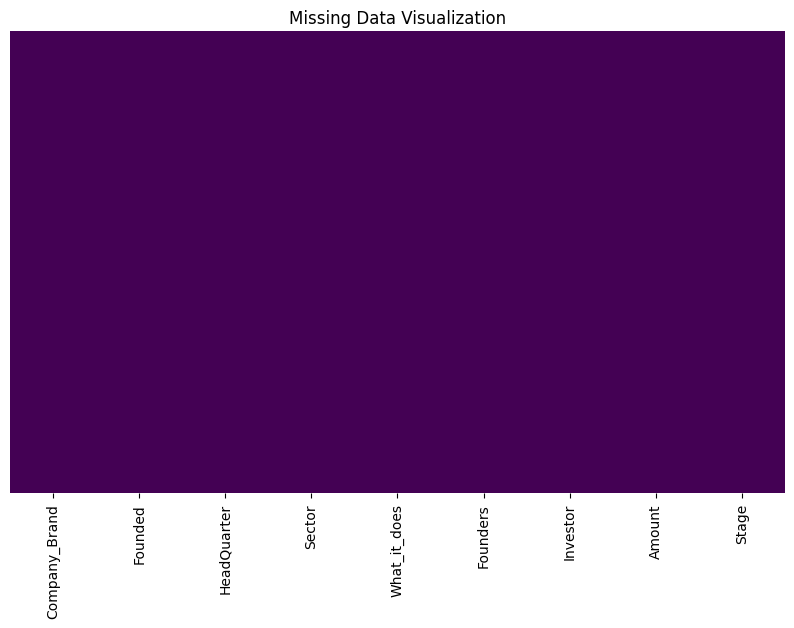

Missing Values Summary:
 Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64


In [465]:
# Check for missing values
missing_values = cleandata_2021.isnull().sum()

# Visualize missing data
plt.figure(figsize=(5, 3))
sns.heatmap(cleandata_2021.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Visualization')
plt.show()

# Display missing values summary
print("Missing Values Summary:\n", missing_values)

In [428]:
data2019 = pd.read_csv('C:\\Users\\User\\Downloads\\startup_funding2019.csv')

data2019.head()


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


### Visualization for 2019 before cleaning

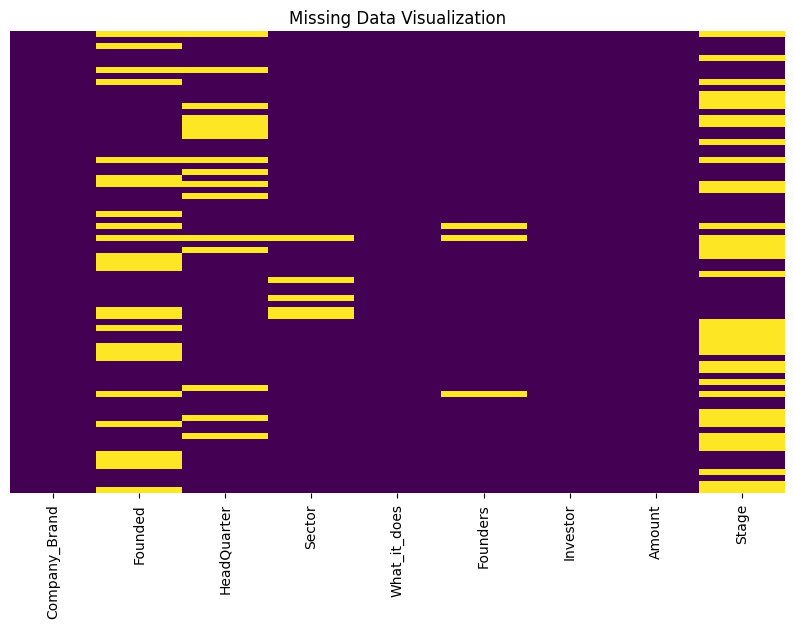

Missing Values Summary:
 Company_Brand     0
Founded          25
HeadQuarter      16
Sector            5
What_it_does      0
Founders          3
Investor          0
Amount            0
Stage            37
dtype: int64


In [466]:
# Check for missing values
missing_values = data2019.isnull().sum()

# Visualize missing data
plt.figure(figsize=(5, 3))
sns.heatmap(data2019.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Visualization')
plt.show()

# Display missing values summary
print("Missing Values Summary:\n", missing_values)

In [429]:
# Rename the 'Amount($)' to 'Amount'
data2019.rename(columns={'Amount($)': 'Amount','Company/Brand':'Company_Brand','What it does': 'What_it_does'}, inplace=True)

In [430]:
# Convert 'Amount' column to string and delete rows where 'Amount' is "Undisclosed" or "undisclosed"
data2019 = data2019[(data2019['Amount'].astype(str).str.lower() != 'undisclosed') & (data2019['Amount'] != 'Undisclosed')]

# Display the DataFrame after deleting the rows
print("DataFrame after deleting rows with 'Undisclosed' or 'undisclosed' in 'Amount' column:")
data2019.head()

DataFrame after deleting rows with 'Undisclosed' or 'undisclosed' in 'Amount' column:


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [431]:
def swap_non_numeric_with_numeric(df):
    amounts_column = 'Amount'
    stage_column = 'Stage'
    investor_column = 'Investor'
 
    # Function to find non-numeric values in 'Amounts' column
    def find_non_numeric_values():
        non_numeric_dict = {}
        for index, value in df[amounts_column].items():
            try:
                pd.to_numeric(value)
            except ValueError:
                non_numeric_dict[index] = value
        return non_numeric_dict
 
    # Function to find numeric values in 'Stage' column
    def find_numeric_values():
        numeric_dict = {}
        for index, value in df[stage_column].items():
            try:
                numeric_dict[index] = pd.to_numeric(value)
            except ValueError:
                pass  # Ignore non-numeric values
        return numeric_dict
 
    # Find non-numeric values in 'Amounts' column
    non_numeric_values = find_non_numeric_values()
 
    # Find numeric values in 'Stage' column
    numeric_values = find_numeric_values()
 
    # Swap non-numeric values in 'Amounts' with numeric values in 'Stage'
    for index, non_numeric_value in non_numeric_values.items():
        if index in numeric_values:
            df.at[index, amounts_column] = numeric_values[index]
 
    # Swap numeric values in 'Stage' with non-numeric values in 'Amounts'
    for index, numeric_value in numeric_values.items():
        if index in non_numeric_values:
            df.at[index, stage_column] = non_numeric_values[index]
 
    # Function to find numeric values in 'Investor' column
    def find_numeric_values_founders():
        numeric_dict = {}
        for index, value in df[investor_column].items():
            try:
                numeric_dict[index] = pd.to_numeric(value)
            except ValueError:
                pass  # Ignore non-numeric values
        return numeric_dict
 
    # Function to find non-numeric values in 'Amounts' column
    def find_non_numeric_values_founders():
        non_numeric_dict = {}
        for index, value in df[amounts_column].items():
            try:
                pd.to_numeric(value)
            except ValueError:
                non_numeric_dict[index] = value
        return non_numeric_dict
 
    # Find non-numeric values in 'Amounts' column
    non_numeric_values = find_non_numeric_values_founders()
 
    # Find numeric values in 'Founders' column
    numeric_values = find_numeric_values_founders()
 
    # Swap non-numeric values in 'Amounts' with numeric values in 'Founders'
    for index, non_numeric_value in non_numeric_values.items():
        if index in numeric_values:
            df.at[index, amounts_column] = numeric_values[index]
 
    # Swap numeric values in 'Founders' with non-numeric values in 'Amounts'
    for index, numeric_value in numeric_values.items():
        if index in non_numeric_values:
            df.at[index, investor_column] = non_numeric_values[index]
 
    return df
 
 
def strip_dollar_and_comma(df):
    # Assuming column names are 'Amounts' and 'Stage'
    numeric_columns = ['Investor', 'Amount', 'Stage']
 
    # Iterate through numeric columns and strip dollar sign ($) and comma (,)
    for column in numeric_columns:
        df[column] = df[column].replace('[\$ ,]', '', regex=True)
 
    return df
 
 
def replace_non_numeric_with_zero(df):
    # Assuming column name is 'Amounts'
    amounts_column = 'Amount'
    # Replace non-numeric values in 'Amounts' column with 0
    df[amounts_column] = pd.to_numeric(df[amounts_column], errors='coerce').fillna(0).astype(int)
 
    return df


def fill_null_values(df):
    # Specify the columns to fill with 'N/A'
    columns_to_fill_na = ['HeadQuarter', 'Investor', 'Stage','Sector']
 
    # Fill null values in specified columns with 'N/A'
    df[columns_to_fill_na] = df[columns_to_fill_na].fillna('N/A')

    # Fill null values in 'Founded' with 0   
    df['Founded'] = df['Founded'].fillna(0)

    # Convert 'Founded' values to integers    
    df['Founded'] = df['Founded'].astype(int)
 
    return df


  
 
# Example usage
#data = {'Founders': ['$1,200', '$1,300,000', '', 'D', 'E', 'F', '', 'H', 'J', 'K'],
       # 'Amounts': ['A', 'Undisclosed', '$4,000', '$5,000', 'undisclosed', '$7,000,000', 'Seed', '$4,000', 'series A', '$5,000'],
       # 'Stage': ['Upsparks', 'Series C', 'series c', 'seed', 'seed', 'seed', '$2,000', 'seed', '$3,000', 'series A']}
df = pd.DataFrame(data2019)
 
# Display the DataFrame before processing
#print("DataFrame before processing:")
#print(df)
info = df.info()
#print("\n Info before processing")
#print(info)
 
# Call the function to replace NaN values in 'Founders' with "N/A"
df['Founders'] = df['Founders'].fillna('N/A')
 
# Call the function to strip dollar sign and comma from numeric values
df = strip_dollar_and_comma(df)
 
# Display the DataFrame after stripping dollar sign and comma
#print("\nDataFrame after stripping dollar sign and comma:")
#print(df)
 
# Call the function to swap non-numeric with numeric values
df = swap_non_numeric_with_numeric(df)
 
# Display the DataFrame after swapping Numerical values in Stage with non-numericals in amounts
#print("\nDataFrame after swapping numeric in 'Stage' with non-numeric values in 'Amount':")
#print(df)
 
# Call the function to swap numeric with non-numeric values in 'Founders'
df = swap_non_numeric_with_numeric(df)
 
# Display the DataFrame after swapping numeric with non-numeric values in 'Founders'
#print("\nDataFrame after swapping numeric in 'Founders' with non-numeric values in 'Amount':")
#print(df)

# Call the function to fill null values with 'N/A'
df = fill_null_values(df)
 # Display the DataFrame after filling null values
#print("\nDataFrame after filling null values with 'N/A':")
#print(df)

# Call the function to replace non-numeric values in 'Amounts' with 0
df = replace_non_numeric_with_zero(df)

# Call the function to fill null values in  'Founded' with 0
df = fill_null_values(df) 
# Display the DataFrame after filling null values
#print("\nDataFrame after filling null values with 'N/A' and 'Founded' with 0:")
#print(df)

 
 
# Display the DataFrame after replacing non-numeric values with 0
#My amounts column should have all numerics
#print("\nDataFrame after replacing non-numeric values with 0 :")
print("\nDataFrame after processing:")
cleandata_2019=df
cleandata_2019.head(10)

 


DataFrame before processing:
      Company_Brand  Founded HeadQuarter                   Sector  \
0    Bombay Shaving      NaN         NaN                Ecommerce   
1         Ruangguru   2014.0      Mumbai                   Edtech   
2          Eduisfun      NaN      Mumbai                   Edtech   
3          HomeLane   2014.0     Chennai          Interior design   
4          Nu Genes   2004.0   Telangana                 AgriTech   
..              ...      ...         ...                      ...   
84     Infra.Market      NaN      Mumbai                Infratech   
85              Oyo   2013.0    Gurugram              Hospitality   
86       GoMechanic   2016.0       Delhi  Automobile & Technology   
87           Spinny   2015.0       Delhi               Automobile   
88  Ess Kay Fincorp      NaN   Rajasthan                  Banking   

                                         What_it_does  \
0          Provides a range of male grooming products   
1   A learning platform that

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Bombay Shaving,0,N/A,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,SixthSenseVentures,6300000,N/A
1,Ruangguru,2014,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",GeneralAtlantic,150000000,SeriesC
2,Eduisfun,0,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,DeepakParekhAmitabhBachchanPiyushPandey,28000000,Freshfunding
3,HomeLane,2014,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath",EvolvenceIndiaFund(EIF)PidiliteGroupFJLabs,30000000,SeriesD
4,Nu Genes,2004,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,InnovationinFoodandAgriculture(IFA),6000000,N/A
7,Kratikal,2013,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa",GildaVCArtVentureRajeevChitrabhanu.,1000000,PreseriesA
8,Quantiphi,0,N/A,AI & Tech,It is an AI and big data services company prov...,Renuka Ramnath,MultiplesAlternateAssetManagement,20000000,SeriesA
9,Lenskart,2010,Delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,275000000,SeriesG
11,Appnomic,0,Bangalore,SaaS,"It is a self-healing enterprise, the IT operat...",D Padmanabhan,AvataarVentures,22000000,N/A
12,Kaleidofin,2018,Chennai,Fintech,Platform that provides complete financial solu...,"Puneet Gupta, Sucharita Mukherjee",Oikocredit,5000000,SeriesA


### Visualization for 2019 data set after cleaning

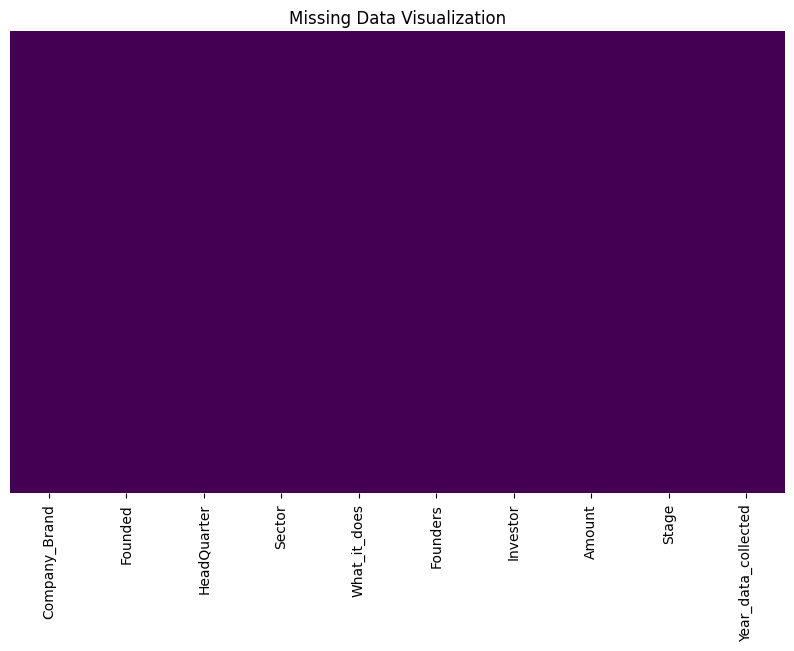

Missing Values Summary:
 Company_Brand          0
Founded                0
HeadQuarter            0
Sector                 0
What_it_does           0
Founders               0
Investor               0
Amount                 0
Stage                  0
Year_data_collected    0
dtype: int64


In [467]:
# Check for missing values
missing_values = cleandata_2019.isnull().sum()

# Visualize missing data
plt.figure(figsize=(5, 3))
sns.heatmap(cleandata_2019.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Visualization')
plt.show()

# Display missing values summary
print("Missing Values Summary:\n", missing_values)

In [432]:
url = 'https://raw.github.com/Azubi-Africa/Career_Accelerator_LP1-Data_Analysis/main/startup_funding2018.csv'
download = requests.get(url).content
data2018 = pd.read_csv(io.StringIO(download.decode('utf-8')))
data2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


###Visualization for 2018 data set before cleaning

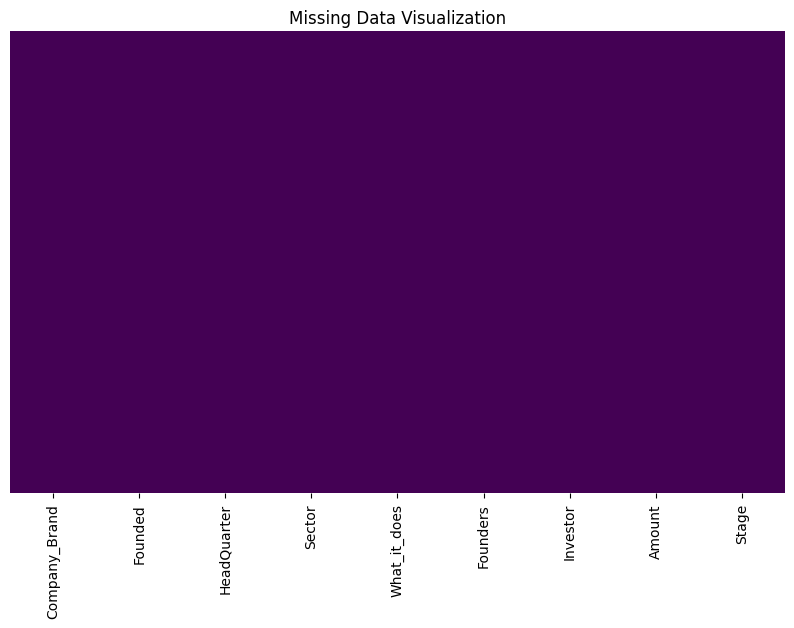

Missing Values Summary:
 Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64


In [469]:
# Check for missing values
missing_values = data2018.isnull().sum()

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(data2018.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Visualization')
plt.show()

# Display missing values summary
print("Missing Values Summary:\n", missing_values)

In [433]:
# Convert 'Amount' column to string and delete rows where 'Amount' is "Undisclosed" or "undisclosed"
data2018 = data2018[(data2018['Amount'].astype(str).str.lower() != 'undisclosed') & (data2018['Amount'] != 'Undisclosed')]

# Display the DataFrame after deleting the rows
print("DataFrame after deleting rows with 'Undisclosed' or 'undisclosed' in 'Amount' column:")
data2018.head()

DataFrame after deleting rows with 'Undisclosed' or 'undisclosed' in 'Amount' column:


,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [434]:

new_names = {'Company Name':'Company_Brand','Industry':'Sector','Round/Series':'Stage','Location':'HeadQuarter','About Company':'What_it_does'}
df = data2018.rename(columns=new_names)
df.head()

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What_it_does
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [435]:
import numpy as np
# Add new columns with NaN values

df['Founded'] = '0'
df['Founders'] = 'N/A'
df['Investor'] = 'N/A'

In [436]:
# Rearrange columns
columns_order = ['Company_Brand','Founded', 'HeadQuarter', 'Sector','What_it_does','Founders','Investor','Amount','Stage']

df = df.reindex(columns=columns_order)

data2018 = df
data2018

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,TheCollegeFever,0,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",N/A,N/A,250000,Seed
1,Happy Cow Dairy,0,"Mumbai, Maharashtra, India","Agriculture, Farming",A startup which aggregates milk from dairy far...,N/A,N/A,"₹40,000,000",Seed
2,MyLoanCare,0,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,N/A,N/A,"₹65,000,000",Series A
3,PayMe India,0,"Noida, Uttar Pradesh, India","Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,N/A,N/A,2000000,Angel
4,Eunimart,0,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,N/A,N/A,—,Seed
...,...,...,...,...,...,...,...,...,...
521,Udaan,0,"Bangalore, Karnataka, India","B2B, Business Development, Internet, Marketplace","Udaan is a B2B trade platform, designed specif...",N/A,N/A,225000000,Series C
522,Happyeasygo Group,0,"Haryana, Haryana, India","Tourism, Travel",HappyEasyGo is an online travel domain.,N/A,N/A,—,Series A
523,Mombay,0,"Mumbai, Maharashtra, India","Food and Beverage, Food Delivery, Internet",Mombay is a unique opportunity for housewives ...,N/A,N/A,7500,Seed
524,Droni Tech,0,"Mumbai, Maharashtra, India",Information Technology,Droni Tech manufacture UAVs and develop softwa...,N/A,N/A,"₹35,000,000",Seed


In [437]:
data2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Brand  526 non-null    object
 1   Founded        526 non-null    object
 2   HeadQuarter    526 non-null    object
 3   Sector         526 non-null    object
 4   What_it_does   526 non-null    object
 5   Founders       526 non-null    object
 6   Investor       526 non-null    object
 7   Amount         526 non-null    object
 8   Stage          526 non-null    object
dtypes: object(9)
memory usage: 37.1+ KB


### Visualization for 2018 data set after adding new column

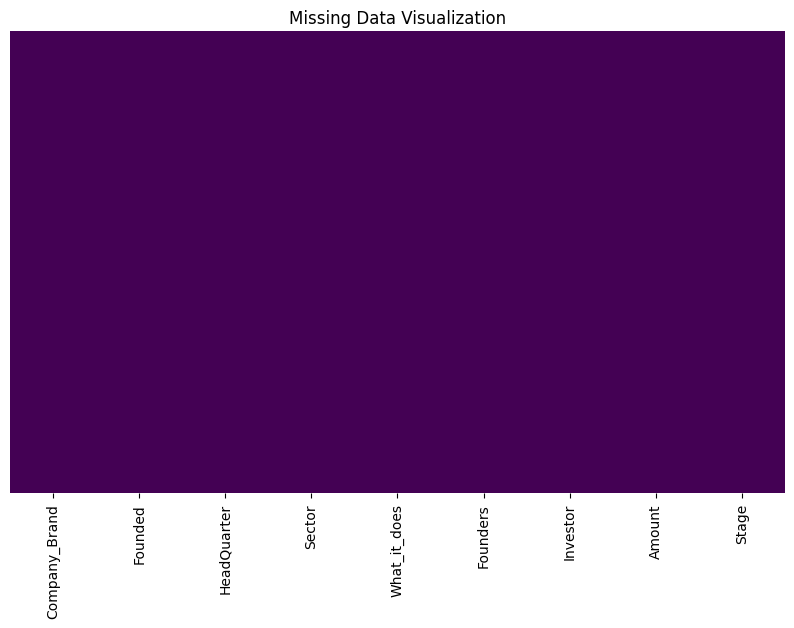

Missing Values Summary:
 Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64


In [470]:
# Check for missing values
missing_values = data2018.isnull().sum()

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(data2018.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Visualization')
plt.show()

# Display missing values summary
print("Missing Values Summary:\n", missing_values)

#cleaning the whole database after rearranging the columns ,inserting the columns and filling the inserted columns with n/a and 0

In [477]:
def swap_non_numeric_with_numeric(df):
    amounts_column = 'Amount'
    stage_column = 'Stage'
    investor_column = 'Investor'
 
    # Function to find non-numeric values in 'Amounts' column
    def find_non_numeric_values():
        non_numeric_dict = {}
        for index, value in df[amounts_column].items():
            try:
                pd.to_numeric(value)
            except ValueError:
                non_numeric_dict[index] = value
        return non_numeric_dict
 
    # Function to find numeric values in 'Stage' column
    def find_numeric_values():
        numeric_dict = {}
        for index, value in df[stage_column].items():
            try:
                numeric_dict[index] = pd.to_numeric(value)
            except ValueError:
                pass  # Ignore non-numeric values
        return numeric_dict
 
    # Find non-numeric values in 'Amounts' column
    non_numeric_values = find_non_numeric_values()
 
    # Find numeric values in 'Stage' column
    numeric_values = find_numeric_values()
 
    # Swap non-numeric values in 'Amounts' with numeric values in 'Stage'
    for index, non_numeric_value in non_numeric_values.items():
        if index in numeric_values:
            df.at[index, amounts_column] = numeric_values[index]
 
    # Swap numeric values in 'Stage' with non-numeric values in 'Amounts'
    for index, numeric_value in numeric_values.items():
        if index in non_numeric_values:
            df.at[index, stage_column] = non_numeric_values[index]
 
    # Function to find numeric values in 'Investor' column
    def find_numeric_values_founders():
        numeric_dict = {}
        for index, value in df[investor_column].items():
            try:
                numeric_dict[index] = pd.to_numeric(value)
            except ValueError:
                pass  # Ignore non-numeric values
        return numeric_dict
 
    # Function to find non-numeric values in 'Amounts' column
    def find_non_numeric_values_founders():
        non_numeric_dict = {}
        for index, value in df[amounts_column].items():
            try:
                pd.to_numeric(value)
            except ValueError:
                non_numeric_dict[index] = value
        return non_numeric_dict
 
    # Find non-numeric values in 'Amounts' column
    non_numeric_values = find_non_numeric_values_founders()
 
    # Find numeric values in 'Founders' column
    numeric_values = find_numeric_values_founders()
 
    # Swap non-numeric values in 'Amounts' with numeric values in 'Founders'
    for index, non_numeric_value in non_numeric_values.items():
        if index in numeric_values:
            df.at[index, amounts_column] = numeric_values[index]
 
    # Swap numeric values in 'Founders' with non-numeric values in 'Amounts'
    for index, numeric_value in numeric_values.items():
        if index in non_numeric_values:
            df.at[index, investor_column] = non_numeric_values[index]
 
    return df
 
 
def strip_dollar_and_comma(df):
    # Assuming column names are 'Amounts' and 'Stage'
    numeric_columns = ['Investor', 'Amount', 'Stage']
 
    # Iterate through numeric columns and strip dollar sign ($) and comma (,)
    for column in numeric_columns:
        df[column] = df[column].replace('[\₹ ,]', '', regex=True)
 
    return df
 
 
def replace_non_numeric_with_zero(df):
    # Assuming column name is 'Amounts'
    amounts_column = 'Amount'
    # Replace non-numeric values in 'Amounts' column with 0
    df[amounts_column] = pd.to_numeric(df[amounts_column], errors='coerce').fillna(0).astype(int)
 
    return df


def fill_null_values(df):
    # Specify the columns to fill with 'N/A'
    columns_to_fill_na = ['HeadQuarter', 'Investor', 'Stage','Sector']
 
    # Fill null values in specified columns with 'N/A'
    df[columns_to_fill_na] = df[columns_to_fill_na].fillna('N/A')

    # Fill null values in 'Founded' with 0   
    df['Founded'] = df['Founded'].fillna(0)

    # Convert 'Founded' values to integers    
    df['Founded'] = df['Founded'].astype(int)
 
    return df


  
 
# Example usage
#data = {'Founders': ['$1,200', '$1,300,000', '', 'D', 'E', 'F', '', 'H', 'J', 'K'],
       # 'Amounts': ['A', 'Undisclosed', '$4,000', '$5,000', 'undisclosed', '$7,000,000', 'Seed', '$4,000', 'series A', '$5,000'],
       # 'Stage': ['Upsparks', 'Series C', 'series c', 'seed', 'seed', 'seed', '$2,000', 'seed', '$3,000', 'series A']}
df = pd.DataFrame(data2018)
 
# Display the DataFrame before processing
#print("DataFrame before processing:")
#print(df)
info = df.info()
#print("\n Info before processing")
#print(info)
 
# Call the function to replace NaN values in 'Founders' with "N/A"
df['Founders'] = df['Founders'].fillna('N/A')
 
# Call the function to strip dollar sign and comma from numeric values
df = strip_dollar_and_comma(df)
 
# Display the DataFrame after stripping dollar sign and comma
#print("\nDataFrame after stripping dollar sign and comma:")
#print(df)
 
# Call the function to swap non-numeric with numeric values
df = swap_non_numeric_with_numeric(df)
 
# Display the DataFrame after swapping Numerical values in Stage with non-numericals in amounts
#print("\nDataFrame after swapping numeric in 'Stage' with non-numeric values in 'Amount':")
#print(df)
 
# Call the function to swap numeric with non-numeric values in 'Founders'
df = swap_non_numeric_with_numeric(df)
 
# Display the DataFrame after swapping numeric with non-numeric values in 'Founders'
#print("\nDataFrame after swapping numeric in 'Founders' with non-numeric values in 'Amount':")
#print(df)
# Call the function to fill null values with 'N/A'
df = fill_null_values(df)
 # Display the DataFrame after filling null values
#print("\nDataFrame after filling null values with 'N/A':")

print(df)
# Call the function to replace non-numeric values in 'Amounts' with 0
df = replace_non_numeric_with_zero(df)

# Call the function to fill null values in  'Founded' with 0
df = fill_null_values(df) 
# Display the DataFrame after filling null values
#print("\nDataFrame after filling null values with 'N/A' and 'Founded' with 0:")
#print(df)

 
 
# Display the DataFrame after replacing non-numeric values with 0
#My amounts column should have all numerics
#print("\nDataFrame after replacing non-numeric values with 0 :")
print("\nDataFrame after processing:")
cleandata_2018=df
cleandata_2018.head()

 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Brand  526 non-null    object
 1   Founded        526 non-null    object
 2   HeadQuarter    526 non-null    object
 3   Sector         526 non-null    object
 4   What_it_does   526 non-null    object
 5   Founders       526 non-null    object
 6   Investor       526 non-null    object
 7   Amount         526 non-null    object
 8   Stage          526 non-null    object
dtypes: object(9)
memory usage: 37.1+ KB


         Company_Brand  Founded                       HeadQuarter  \
0      TheCollegeFever        0       Bangalore, Karnataka, India   
1      Happy Cow Dairy        0        Mumbai, Maharashtra, India   
2           MyLoanCare        0           Gurgaon, Haryana, India   
3          PayMe India        0       Noida, Uttar Pradesh, India   
4             Eunimart        0  Hyderabad, Andhra Pradesh, India   
..                 ...      ...                               ...   
521              Udaan        0       Bangalore, Karnataka, India   
522  Happyeasygo Group        0           Haryana, Haryana, India   
523             Mombay        0        Mumbai, Maharashtra, India   
524         Droni Tech        0        Mumbai, Maharashtra, India   
525            Netmeds        0        Chennai, Tamil Nadu, India   

                                                Sector  \
0    Brand Marketing, Event Promotion, Marketing, S...   
1                                 Agriculture, Farming 

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,TheCollegeFever,0,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",N/A,N/A,250000,Seed
1,Happy Cow Dairy,0,"Mumbai, Maharashtra, India","Agriculture, Farming",A startup which aggregates milk from dairy far...,N/A,N/A,40000000,Seed
2,MyLoanCare,0,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,N/A,N/A,65000000,SeriesA
3,PayMe India,0,"Noida, Uttar Pradesh, India","Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,N/A,N/A,2000000,Angel
4,Eunimart,0,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,N/A,N/A,0,Seed


### Visualization for 2018 data set after cleaning

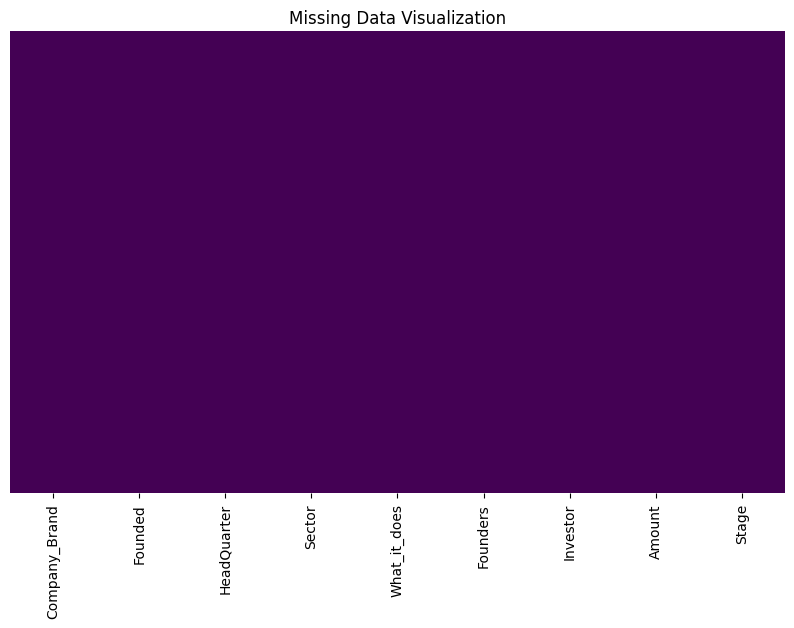

Missing Values Summary:
 Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64


In [472]:
# Check for missing values
missing_values = cleandata_2018.isnull().sum()

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(cleandata_2018.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Visualization')
plt.show()

# Display missing values summary
print("Missing Values Summary:\n", missing_values)

In [441]:
# concantinating the databases
# Assuming you have datasets named data2021, data2020, data2019, data2018
 
# Sample data for illustration
#final_2020 = pd.final_2020
#cleandata_2021 = pd.cleandata_2021
#cleandata_2019 = pd.cleandata_2019
#cleandata_2018 = pd.cleandata_2018
 
# Concatenate datasets and create an additional 'Year' column
#concatenated_data = pd.concat([final_2020, cleandata_2021, cleandata_2019, cleandata_2018], keys=['2020', '2021', '2019', '2018'], names=['Year'])
#full_data = concatenated_data
#concatenated_data.head





In [447]:
# Add a column indicating the year data was collected 
cleandata_2021['Year_data_collected'] = '2021'
final_2020['Year_data_collected'] = '2020'
cleandata_2019['Year_data_collected'] = '2019'
cleandata_2018['Year_data_collected'] = '2018'

# Concatenate the DataFrames vertically
full_data = pd.concat([cleandata_2021, final_2020,cleandata_2019, cleandata_2018], ignore_index=True)

# Display the concatenated DataFrame
print("Concatenated DataFrame:")
full_data

Concatenated DataFrame:


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year_data_collected
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon",BEENEXTEntrepreneurFirst,1200000,Pre-seriesA,2021
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...",UnilazerVenturesIIFLAssetManagement,120000000,N/A,2021
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta",GSVVenturesWestbridgeCapital,30000000,SeriesD,2021
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal",CDCGroupIDGCapital,51000000,SeriesC,2021
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,LiberathaKallatMukeshYadavDineshNagpal,2000000,Seed,2021
...,...,...,...,...,...,...,...,...,...,...
2819,Udaan,0,"Bangalore, Karnataka, India","B2B, Business Development, Internet, Marketplace","Udaan is a B2B trade platform, designed specif...",N/A,N/A,225000000,SeriesC,2018
2820,Happyeasygo Group,0,"Haryana, Haryana, India","Tourism, Travel",HappyEasyGo is an online travel domain.,N/A,N/A,0,SeriesA,2018
2821,Mombay,0,"Mumbai, Maharashtra, India","Food and Beverage, Food Delivery, Internet",Mombay is a unique opportunity for housewives ...,N/A,N/A,7500,Seed,2018
2822,Droni Tech,0,"Mumbai, Maharashtra, India",Information Technology,Droni Tech manufacture UAVs and develop softwa...,N/A,N/A,35000000,Seed,2018


In [452]:
# Check for duplicate entries
print("\nDuplicate Entries:", full_data.duplicated().sum())

# Drop duplicates if necessary
full_data.drop_duplicates(inplace=True)


Duplicate Entries: 23


In [453]:
full_data.shape

(2801, 10)

### Visualization for full data after  cleaning

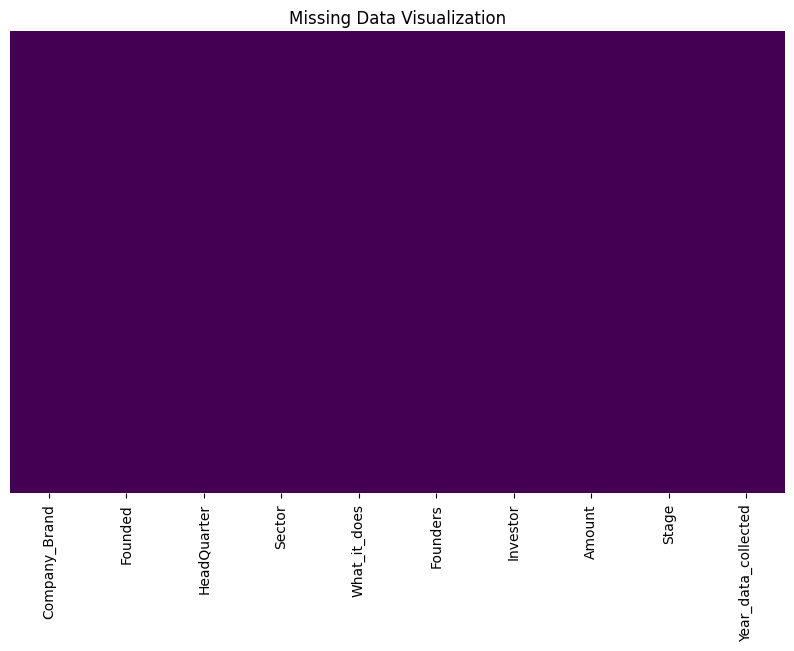

Missing Values Summary:
 Company_Brand          0
Founded                0
HeadQuarter            0
Sector                 0
What_it_does           0
Founders               0
Investor               0
Amount                 0
Stage                  0
Year_data_collected    0
dtype: int64


In [479]:
# Check for missing values
missing_values = full_data.isnull().sum()

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(full_data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Visualization')
plt.show()

# Display missing values summary
print("Missing Values Summary:\n", missing_values)

Exploratory Data Analysis

### Summary statistics

In [480]:
full_data.describe()

,Founded,Amount
count,2801.000000,2.801000e+03
mean,1466.141021,2.123594e+07
std,898.065979,1.856028e+08
min,0.000000,-2.147484e+09
25%,0.000000,2.000000e+05
50%,2015.000000,2.000000e+06
75%,2018.000000,1.000000e+07
max,2021.000000,2.029600e+09


### Exploring Distribution between amount and sector

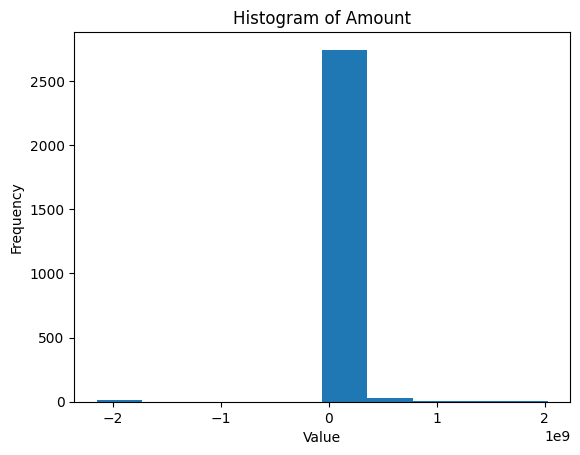

In [485]:
import matplotlib.pyplot as plt

# Histogram of a numerical column
plt.hist(full_data['Amount'])

plt.xlabel('Value')

plt.ylabel('Frequency')

plt.title('Histogram of Amount')

plt.show()

In [493]:
import plotly.express as px
# Visualize the distribution of hours worked vs. salary levels using a histogram

fig = px.histogram(full_data, x="Amounts", color="Sector", title="Distribution of Hours Worked by Salary Level")
fig.show()

ModuleNotFoundError: No module named 'plotly'

### Exploring Relationships